In [50]:

import numpy as np
from numpy import array
import random
import matplotlib.pyplot as plt
import math
TRAIN_FILE="mnist_train.csv"
TEST_FILE="mnist_test.csv"
num_layers=3
num_itr=100
neuron_num=784;
hidden_layer_neuron = 100;
result_class=10;
step = 0.1;
bias=0;
model_file="model.csv"

In [1]:
def activation_function(value):  #implement sigmoid for better results
    return 1/(1+math.exp(-value))

In [7]:
def front_prop(inputs,model,layers):
    input_vals = inputs
    # print(input_vals)
    output_vals = np.array([])
    f = np.vectorize(activation_function, otypes=[np.float])
    for layer in range(0,layers):
#         print(layer)
        input_n = len(input_vals)  # number of inputs of this layer
        if(layer == layers - 1):
            output_n = result_class;
        else:
            output_n = hidden_layer_neuron;
        # print(input_n)
        # print(output_n)
        layerweights = model[layer,:input_n*output_n].reshape(output_n,input_n);
        # print(layerweights.shape)
        mult = np.dot(layerweights,input_vals) + bias
        # print(mult.shape)
        outputs = f(mult)
        # print(outputs.shape)
        output_vals = np.append(output_vals,outputs);
        input_vals = outputs;
    return (output_vals); # giving output as appended array

In [10]:
def out(outputs):
    return np.where(outputs==outputs.max())[0][0]

In [52]:
def test(tests,layer,model,outFile):
#     n = tests[:,1:]
#     v = tests[:,0]
#     incorrect = 0
    with open(outFile,'w')  as f:
        f.write('id,label\n')
        for i in range(0,len(tests)):
            outputs=front_prop(tests[i]/255.0,model,layer)[-10:]
#             print(str(i)+" "+str(outputs))
            result = out(outputs)
#             if(result != int(v[i])):
#                 incorrect= incorrect+1;
            print(result)
            f.write(str(i+1)+","+str(result)+"\n");
#         print(incorrect)
        f.close()

In [72]:
def train_test(tests,layer,model):
    n = tests[:,1:]/255.0
    v = tests[:,0]
#     for i in range(0,len(tests)):
    outputs=np.apply_along_axis(front_prop,axis=1,arr=n,model=model,layers=layer)[:,-result_class:]
    print(outputs.shape)
    result = np.apply_along_axis(out,axis=1,arr=outputs)
    incorrect=len(tests)-np.count_nonzero(np.equal(v,result))
#         print(result)
    print(incorrect)
    return incorrect

In [17]:
test_file = np.genfromtxt(TEST_FILE,delimiter=",");

In [12]:
train_file = np.genfromtxt(TRAIN_FILE,delimiter=',');

In [57]:
train_test_file = np.genfromtxt('1mnist_train.csv',delimiter=',');

In [58]:
train_test_file.shape

(60000, 785)

In [27]:
model = np.loadtxt('t.csv')

In [36]:
model = np.loadtxt('iteration43.csv')

In [38]:
model.shape

(3, 78400)

In [9]:
model.shape

(2, 78400)

In [73]:
model_p = np.loadtxt('iteration1.csv')

In [13]:
model_p.shape

(2,)

In [77]:
newtrain=train_test_file[:7000]

In [78]:
newtrain.shape


(7000, 785)

In [74]:
train_test(train_test_file,num_layers,model_p)

(60000, 10)
10457


10457

In [79]:

classification = np.zeros(num_itr)
for i in range(0,num_itr):
    print('Loading iteration'+str(i+1)+'.csv')
    model = np.loadtxt('iteration'+str(i+1)+'.csv')
    print('Calculating Value')
    classification[i] = train_test(newtrain,num_layers,model)

Loading iteration1.csv
Calculating Value
(7000, 10)
1141
Loading iteration2.csv
Calculating Value
(7000, 10)
809
Loading iteration3.csv
Calculating Value
(7000, 10)
689
Loading iteration4.csv
Calculating Value
(7000, 10)
624
Loading iteration5.csv
Calculating Value
(7000, 10)
572
Loading iteration6.csv
Calculating Value
(7000, 10)
551
Loading iteration7.csv
Calculating Value
(7000, 10)
541
Loading iteration8.csv
Calculating Value
(7000, 10)
525
Loading iteration9.csv
Calculating Value
(7000, 10)
504
Loading iteration10.csv
Calculating Value
(7000, 10)
497
Loading iteration11.csv
Calculating Value
(7000, 10)
491
Loading iteration12.csv
Calculating Value
(7000, 10)
488
Loading iteration13.csv
Calculating Value
(7000, 10)
483
Loading iteration14.csv
Calculating Value
(7000, 10)
476
Loading iteration15.csv
Calculating Value
(7000, 10)
469
Loading iteration16.csv
Calculating Value
(7000, 10)
470
Loading iteration17.csv
Calculating Value
(7000, 10)
459
Loading iteration18.csv
Calculating Val

In [48]:
itr = 73
misclassification=np.zeros(num_itr)
for i in range(0,num_itr):
    print('Loading iteration'+str(i+1)+'.csv')
    model = np.loadtxt('iteration'+str(i+1)+'.csv')
    print('Calculating Value')
    misclassification[i] = train_test(train_file,num_layers,model)

Loading iteration1.csv
Calculating Value
1073
Loading iteration2.csv
Calculating Value
737
Loading iteration3.csv
Calculating Value
560
Loading iteration4.csv
Calculating Value
445
Loading iteration5.csv
Calculating Value
389
Loading iteration6.csv
Calculating Value
354
Loading iteration7.csv
Calculating Value
323
Loading iteration8.csv
Calculating Value
293
Loading iteration9.csv
Calculating Value
257
Loading iteration10.csv
Calculating Value
236
Loading iteration11.csv
Calculating Value
219
Loading iteration12.csv
Calculating Value
205
Loading iteration13.csv
Calculating Value
190
Loading iteration14.csv
Calculating Value
177
Loading iteration15.csv
Calculating Value
166
Loading iteration16.csv
Calculating Value
157
Loading iteration17.csv
Calculating Value
146
Loading iteration18.csv
Calculating Value
140
Loading iteration19.csv
Calculating Value
134
Loading iteration20.csv
Calculating Value
131
Loading iteration21.csv
Calculating Value
123
Loading iteration22.csv
Calculating Value


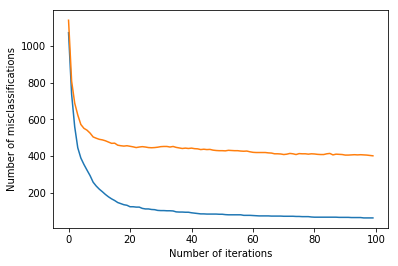

In [81]:
# Plot
plt.plot(misclassification)
plt.plot(classification)
plt.ylabel('Number of misclassifications')
plt.xlabel('Number of iterations')
plt.show()

In [56]:
test(test_file,num_layers,np.loadtxt('iteration35.csv'),'test_submit.csv')

1
5
6
5
4
7
0
4
2
3
4
6
7
6
5
7
2
3
8
6
1
6
6
8
5
0
4
0
1
6
9
3
5
8
0
8
8
7
6
5
4
7
2
4
0
0
9
3
7
7
3
8
7
4
4
7
5
3
1
2
1
1
7
2
6
5
3
0
8
4
3
9
6
1
7
9
6
6
5
0
3
8
0
1
9
6
0
3
5
1
8
5
4
2
7
4
6
5
3
9
6
5
5
6
5
0
5
8
5
2
4
0
7
5
5
0
6
4
6
5
2
4
5
2
0
7
8
8
0
9
7
5
2
8
0
2
9
0
7
7
3
8
8
0
6
8
5
2
1
3
8
4
9
3
9
9
4
0
3
6
1
9
5
1
3
0
5
0
5
0
3
6
2
3
7
1
1
3
2
7
2
6
3
7
6
2
9
6
5
4
6
9
2
1
1
0
5
8
7
1
0
2
9
4
0
7
5
3
6
3
9
3
3
9
1
3
2
7
4
3
2
0
9
3
9
8
5
6
4
7
2
0
8
7
5
8
5
4
1
2
6
0
2
9
9
0
7
2
0
7
7
0
7
4
2
7
5
0
4
0
8
4
1
8
8
4
9
0
1
3
5
1
0
9
4
1
4
1
0
6
8
6
7
2
0
4
3
0
5
3
3
6
0
1
8
8
0
8
3
2
3
3
0
5
1
1
8
7
3
5
6
4
2
3
2
3
4
1
9
1
8
9
5
9
5
1
5
3
5
9
3
1
6
7
2
6
3
6
3
8
1
4
0
5
0
5
0
1
3
1
4
6
4
2
3
3
6
7
7
8
2
2
2
5
1
6
2
4
8
2
2
7
2
0
7
1
9
7
4
4
1
4
7
2
3
6
3
2
5
2
3
3
5
9
2
6
1
5
4
6
1
7
6
9
1
6
1
6
0
4
2
7
7
8
1
4
4
5
6
6
7
6
6
5
3
4
9
2
5
9
3
9
5
6
0
8
7
4
7
3
5
8
3
6
1
2
1
4
3
4
8
0
7
1
6
2
9
1
6
2
0
9
1
5
4
2
7
4
9
9
6
5
1
9
6
8
1
9
0
6
6
1
0
5
2
1
4
3
8
5
7
1
4
9
6
8
8
2
3
8
